## Initialization

In [1]:
addpath("lib")
clear; close all; clc;

## Example 1: Microchips classification

### Load Data

In [2]:
data = load('data/microchips_tests.csv');

X = data(:, 1:2);
y = data(:, 3);

### Plot Data

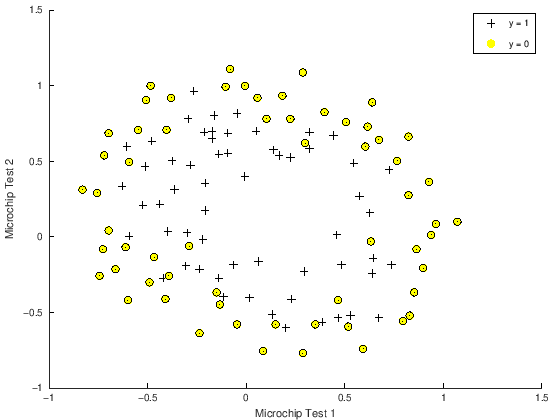

In [3]:
% Find indices of positive and negative examples.
positiveIndices = find(y == 1);
negativeIndices = find(y == 0);

% Plot examples.
figure()
hold on;
plot(X(positiveIndices, 1), X(positiveIndices, 2), 'k+', 'LineWidth', 2, 'MarkerSize', 7);
plot(X(negativeIndices, 1), X(negativeIndices, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);

% Draw labels and Legend
xlabel('Microchip Test 1');
ylabel('Microchip Test 2');
legend('y = 1', 'y = 0');
hold off;

### Run Logistic Regression
We add more polynomial features in order to allow for a non-linear decision boundary.

In [4]:
polynomial_degree = 2;
X_ext = add_polynomial_features(X(:, 1), X(:, 2), polynomial_degree);

lambda = 1; % regularization parameter
[theta, J, J_history, exit_flag] = logistic_regression_train(X_ext, y, lambda);

fprintf('\n');
fprintf('Initial cost: %f\n', J_history(1));
fprintf('Optimized cost: %f\n', J);

Iteration 1 : 0.693147
Iteration 10 : 0.586633
Iteration 20 : 0.583541
Iteration 30 : 0.583038
Iteration 40 : 0.582863

Initial cost: 0.693147
Optimized cost: 0.582863


### Plot Decision Boundaries

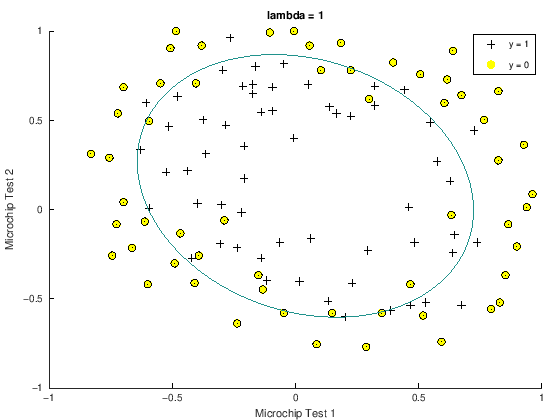

In [5]:
% Generate a grid range.
u = linspace(-1, 1, 50);
v = linspace(-1, 1, 50);
z = zeros(length(u), length(v));
% Evaluate z = (x * theta) over the grid.
for i = 1:length(u)
    for j = 1:length(v)
        % Add polynomials.
        x = add_polynomial_features(u(i), v(j), polynomial_degree);
        % Add ones.
        x = [ones(size(x, 1), 1), x];
        z(i, j) = x * theta;
    end
end

% It is important to transpose z before calling the contour.
z = z';

figure()
hold on;
plot(X(positiveIndices, 1), X(positiveIndices, 2), 'k+', 'LineWidth', 2, 'MarkerSize', 7);
plot(X(negativeIndices, 1), X(negativeIndices, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);

% Plot z = 0
% Notice you need to specify the range [0, 0]
contour(u, v, z, [0, 0], 'LineWidth', 2);

% Draw labels and Legend
xlabel('Microchip Test 1');
ylabel('Microchip Test 2');
title(sprintf('lambda = %g', lambda));
legend('y = 1', 'y = 0', 'Decision boundary');
hold off;

### Prediction

In [6]:
x = [
    0, 0;
    -0.5, -0.5
];

% Add polynomials.
x = add_polynomial_features(x(:, 1), x(:, 2), polynomial_degree);
% Add ones.
x = [ones(size(x, 1), 1), x];

probabilities = hypothesis(x, theta);

for example=1:length(probabilities)
   fprintf('%d : x=%0.1f \ty=%0.1f \tprob=%f \n', example, x(example, 3), x(example, 4), probabilities(example));
end

1 : x=0.0 	y=0.0 	prob=0.768443 
2 : x=-0.5 	y=-0.5 	prob=0.300815 


## Example 2 : MNIST Classification

Visualizing data...


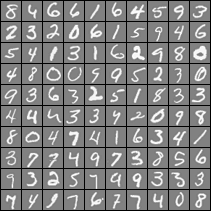

In [7]:
load('data/digits.mat');

% Plotting some training example ----------------------------------------------------
fprintf('Visualizing data...\n');

% Randomly select 100 data points to display
random_digits_indices = randperm(size(X, 1));
random_digits_indices = random_digits_indices(1:100);

figure(2);
display_data(X(random_digits_indices, :));

### Training

In [8]:
% Setup the parameters you will use for this part of the exercise
input_layer_size = 400;  % 20x20 input images of digits.
num_labels = 10; % 10 labels, from 1 to 10 (note that we have mapped "0" to label 10).

fprintf('Training One-vs-All Logistic Regression...\n')
lambda = 0.01;
num_iterations = 50;
[all_theta] = one_vs_all(X, y, num_labels, lambda, num_iterations);

Training One-vs-All Logistic Regression...
Iteration 1 : 0.693147
Iteration 10 : 0.052894
Iteration 20 : 0.038586
Iteration 30 : 0.031530
Iteration 40 : 0.026459
Iteration 50 : 0.021956
Iteration 1 : 0.693147
Iteration 10 : 0.113753
Iteration 20 : 0.090389
Iteration 30 : 0.078301
Iteration 40 : 0.071620
Iteration 50 : 0.068044
Iteration 1 : 0.693147
Iteration 10 : 0.122092
Iteration 20 : 0.096329
Iteration 30 : 0.081831
Iteration 40 : 0.074906
Iteration 50 : 0.071612
Iteration 1 : 0.693147
Iteration 10 : 0.097249
Iteration 20 : 0.068776
Iteration 30 : 0.060544
Iteration 40 : 0.055455
Iteration 50 : 0.049867
Iteration 1 : 0.693147
Iteration 10 : 0.137363
Iteration 20 : 0.102049
Iteration 30 : 0.091267
Iteration 40 : 0.080271
Iteration 50 : 0.074464
Iteration 1 : 0.693147
Iteration 10 : 0.066731
Iteration 20 : 0.048012
Iteration 30 : 0.039916
Iteration 40 : 0.036498
Iteration 50 : 0.032047
Iteration 1 : 0.693147
Iteration 10 : 0.081511
Iteration 20 : 0.063504
Iteration 30 : 0.054225
Iter

### Prediction

In [9]:
fprintf('Predict for One-Vs-All...\n')
pred = one_vs_all_predict(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);

Predict for One-Vs-All...

Training Set Accuracy: 93.120000
